# Featurization , Model Selection and Tuning project

In [116]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
import math
from sklearn.preprocessing import RobustScaler

In [2]:
con = pd.read_csv('Data/concrete.csv')
con.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


### Univariate Analysis

In [3]:
con.shape

(1030, 9)

- The Data has 1030 records and 9 features(including the target)

In [4]:
con.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

- All the Features which are present are numerical types.
- age is an integer and the rest of the features are float

#### Lets go through every single feature below

In [5]:
con.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


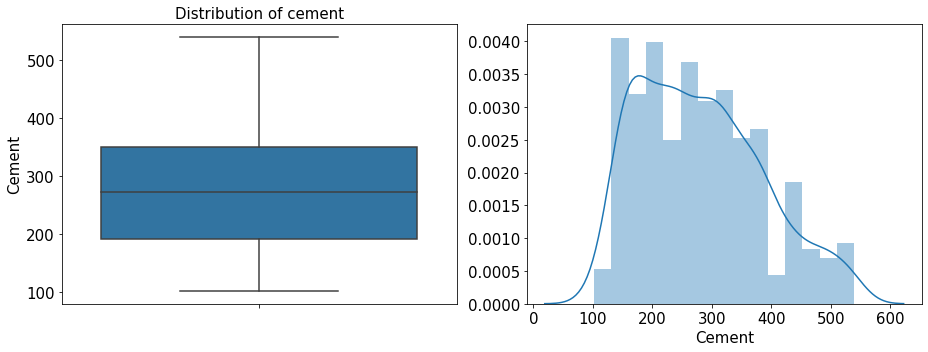

In [6]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(13,5))

sns.boxplot(x='cement',data=con,orient='v',ax=ax1)
ax1.set_ylabel('Cement', fontsize=15)
ax1.set_title('Distribution of cement', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(con['cement'],ax=ax2)
ax2.set_xlabel('Cement', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

- The range of values in the feature cement is from 102 - 540
- mean and median are almost same so there is not be notable skewness in it.
- The data is spread out if we notice the standard deviation which is high

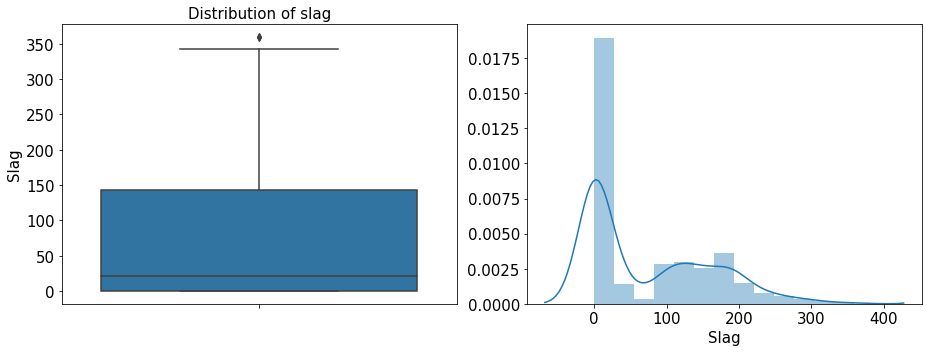

In [7]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(13,5))

sns.boxplot(x='slag',data=con,orient='v',ax=ax1)
ax1.set_ylabel('Slag', fontsize=15)
ax1.set_title('Distribution of slag', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(con['slag'],ax=ax2)
ax2.set_xlabel('Slag', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

- The range of values in the feature cement is from 0 - 359.4
- mean is very high, while median is far lower than mean, so the feature is highly skewed(right skewed).
- The data is spread out if we notice the standard deviation which is high.
- There are some outliers present

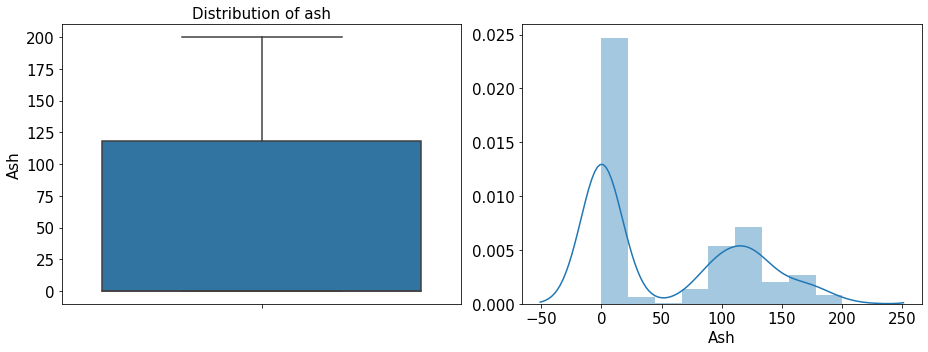

In [8]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(13,5))

sns.boxplot(x='ash',data=con,orient='v',ax=ax1)
ax1.set_ylabel('Ash', fontsize=15)
ax1.set_title('Distribution of ash', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(con['ash'],ax=ax2)
ax2.set_xlabel('Ash', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

- The range of values in the feature cement is from 0 - 200.1
- mean is very high, while median is far lower than mean, so the feature is highly skewed(right skewed).
- The data is spread out if we notice the standard deviation which is high.
- There are no outliers present

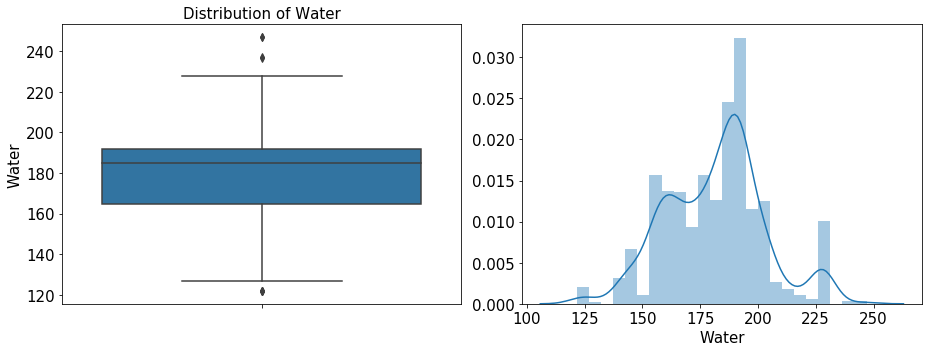

In [9]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(13,5))

sns.boxplot(x='water',data=con,orient='v',ax=ax1)
ax1.set_ylabel('Water', fontsize=15)
ax1.set_title('Distribution of Water', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(con['water'],ax=ax2)
ax2.set_xlabel('Water', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

- The range of values in the feature water is from 121.80 - 241
- mean and median are almost same so there is not much skewness
- The data is spread out if we notice the standard deviation which is high.
- There are outliers present

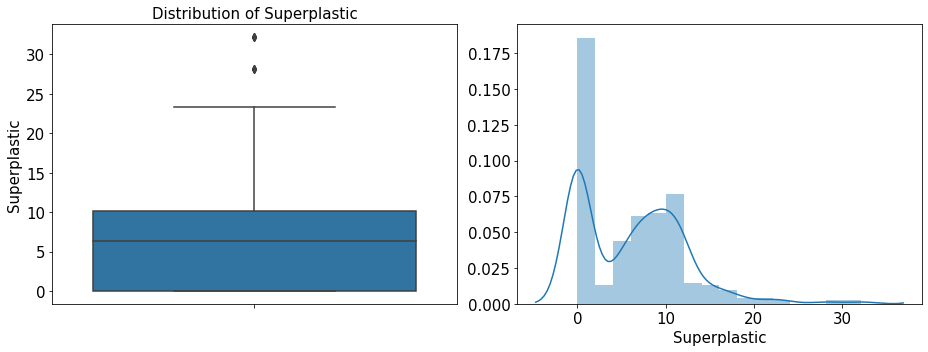

In [10]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(13,5))

sns.boxplot(x='superplastic',data=con,orient='v',ax=ax1)
ax1.set_ylabel('Superplastic', fontsize=15)
ax1.set_title('Distribution of Superplastic', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(con['superplastic'],ax=ax2)
ax2.set_xlabel('Superplastic', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

- The range of values in the feature cement is from 0 - 32.2
- mean and median are same there is no skewness but from the graph we can see there are 2 peaks meaning it has 2 gausians.
- The data is spread out if we notice the standard deviation which is high.
- There are outliers present

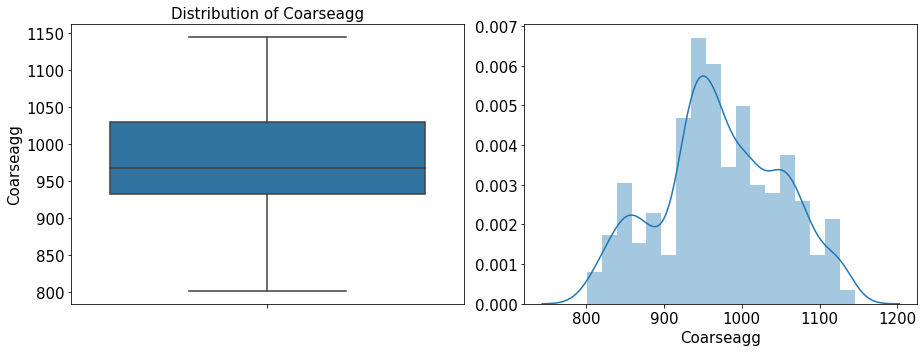

In [11]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(13,5))

sns.boxplot(x='coarseagg',data=con,orient='v',ax=ax1)
ax1.set_ylabel('Coarseagg', fontsize=15)
ax1.set_title('Distribution of Coarseagg', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(con['coarseagg'],ax=ax2)
ax2.set_xlabel('Coarseagg', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

- The range of values in the feature cement is from 801 - 1145
- mean and median are almost same there is not much skewness.
- The data is spread out if we notice the standard deviation which is high.
- There are no outliers present

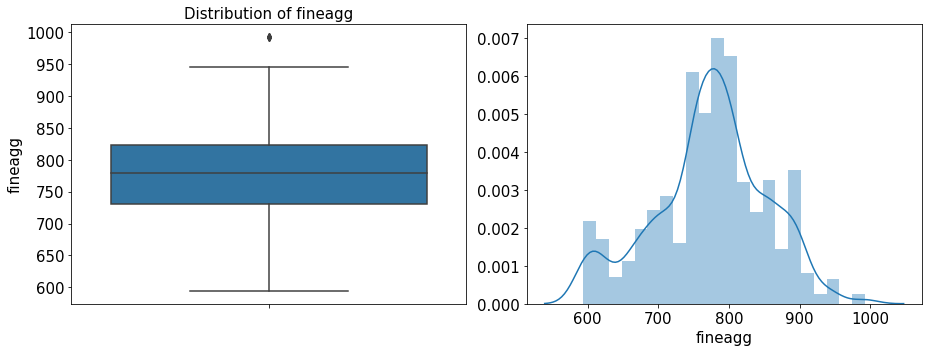

In [12]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(13,5))

sns.boxplot(x='fineagg',data=con,orient='v',ax=ax1)
ax1.set_ylabel('fineagg', fontsize=15)
ax1.set_title('Distribution of fineagg', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(con['fineagg'],ax=ax2)
ax2.set_xlabel('fineagg', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

- The range of values in the feature cement is from 594 - 992.6
- mean and median are almost same so there is not much skewness
- The data is spread out if we notice the standard deviation which is high.
- There are  outliers present

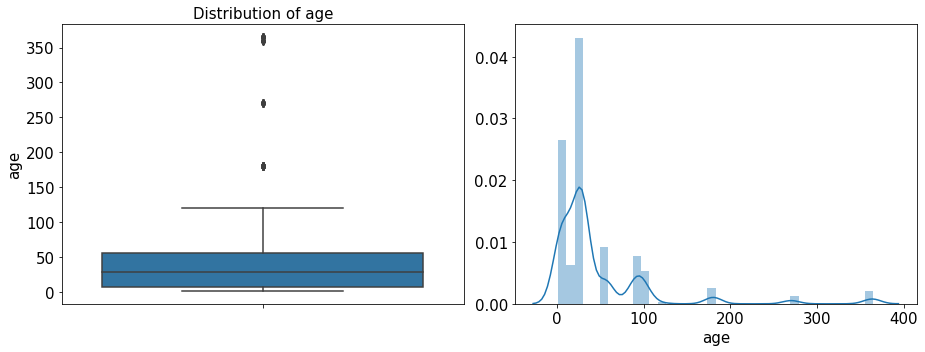

In [13]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(13,5))

sns.boxplot(x='age',data=con,orient='v',ax=ax1)
ax1.set_ylabel('age', fontsize=15)
ax1.set_title('Distribution of age', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(con['age'],ax=ax2)
ax2.set_xlabel('age', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

- The range of values in the feature cement is from 1 - 365
- mean is very high, while median is far lower than mean, so the feature is highly skewed(right skewed).
- The data is spread out if we notice the standard deviation which is high.
- There are outliers present

### MultiVariate Analysis

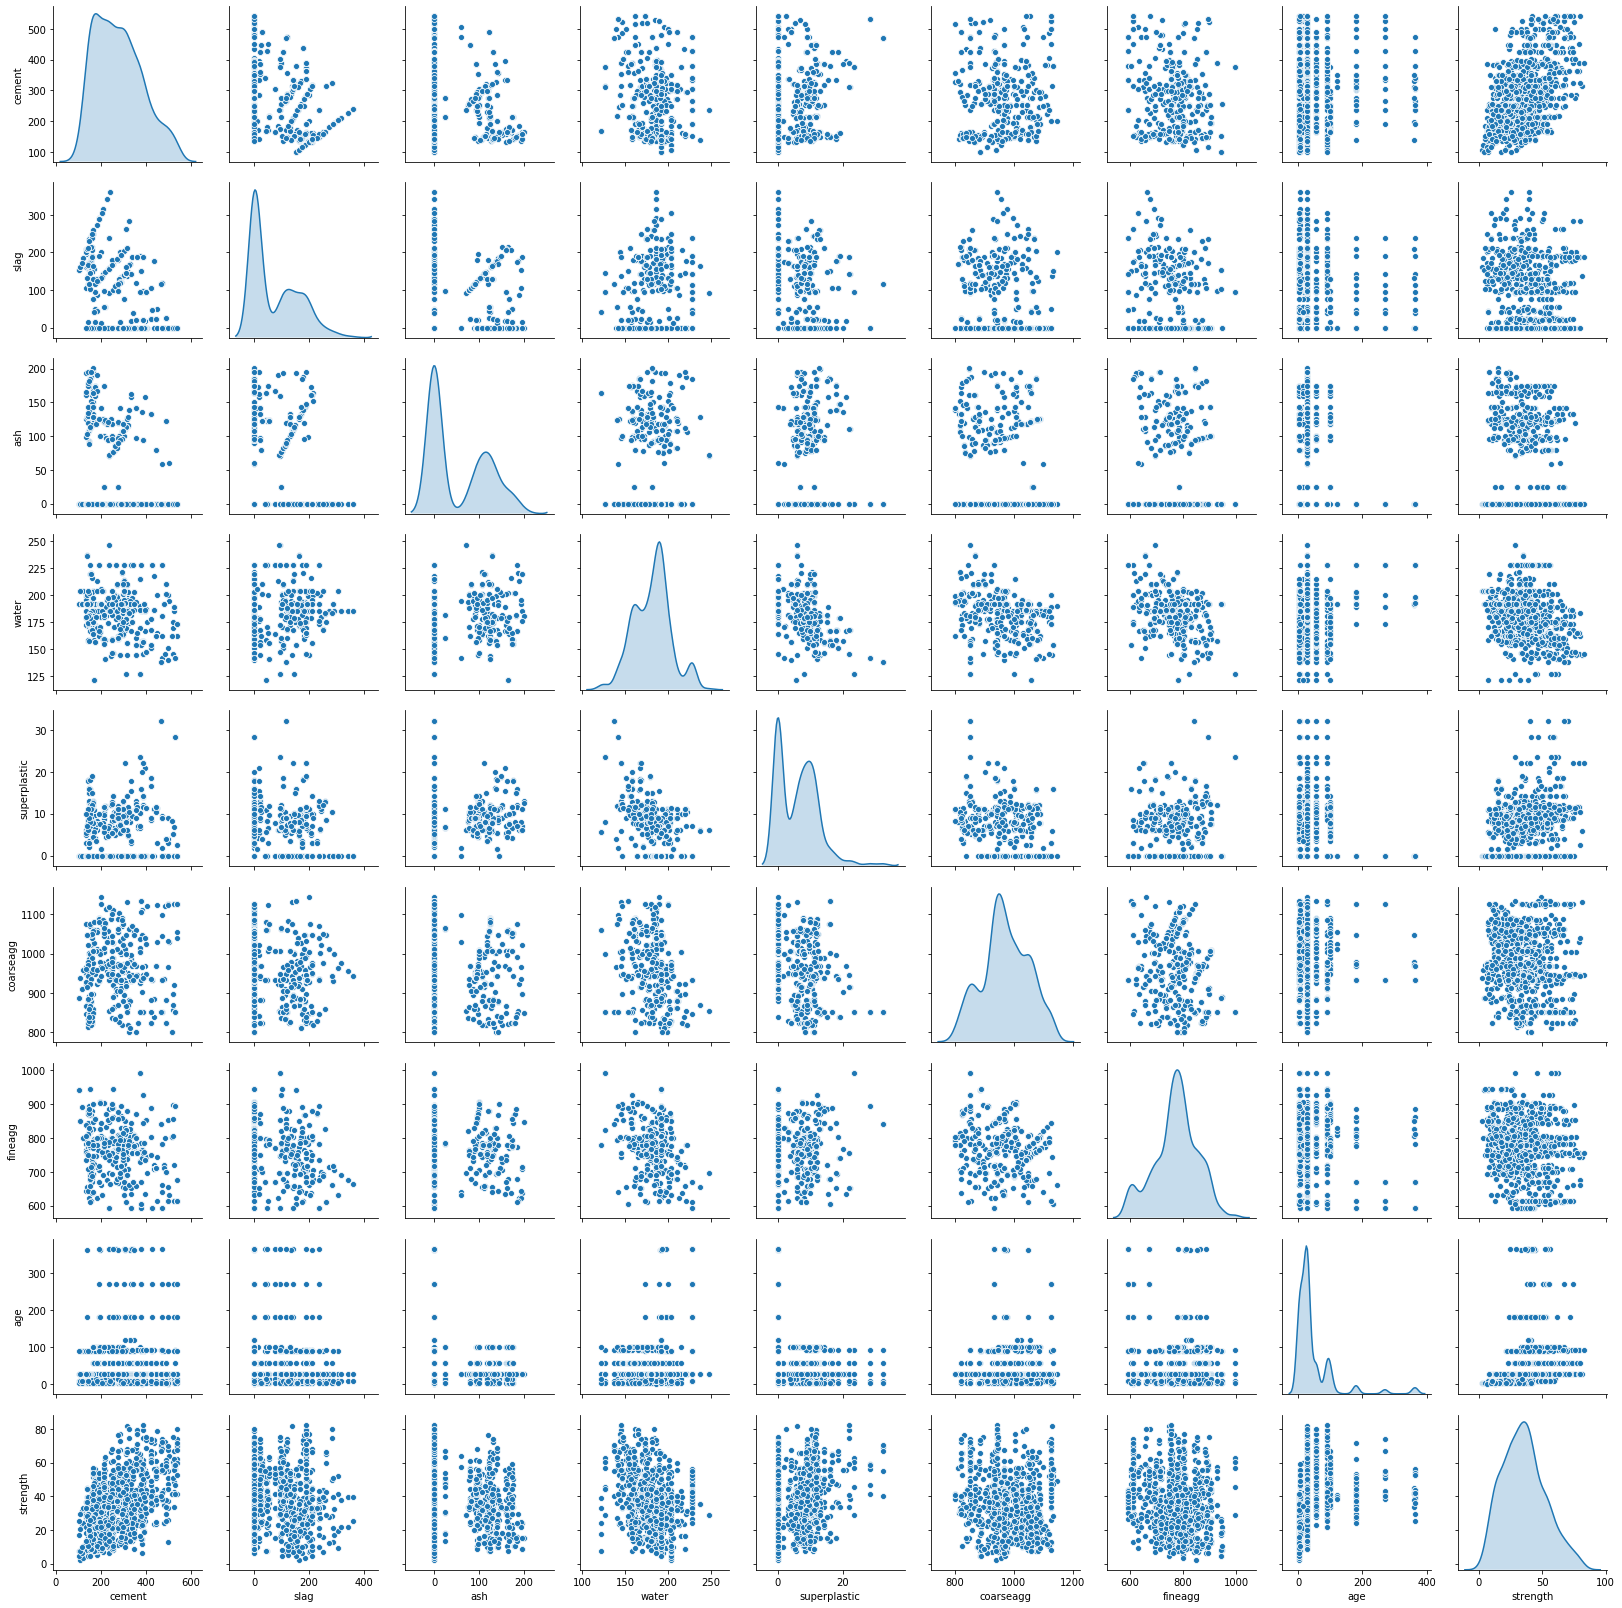

In [14]:
sns.pairplot(con, diag_kind='kde')

- cement attribute have almost normal curve.
- slag, ash has two gausssians and rightly skewed.It shows the presence of outlies.
- water, coarseagg has 3 guassians and slighly left skewed.It shows the presence of outlies. coarseagg curve seems normal.
- superplastic and age has multiple gaussians and rightly skewed.It shows the presence of outlies.
- fineagg has almost two guassians and looks like normal.
- strength is almost normal curve.

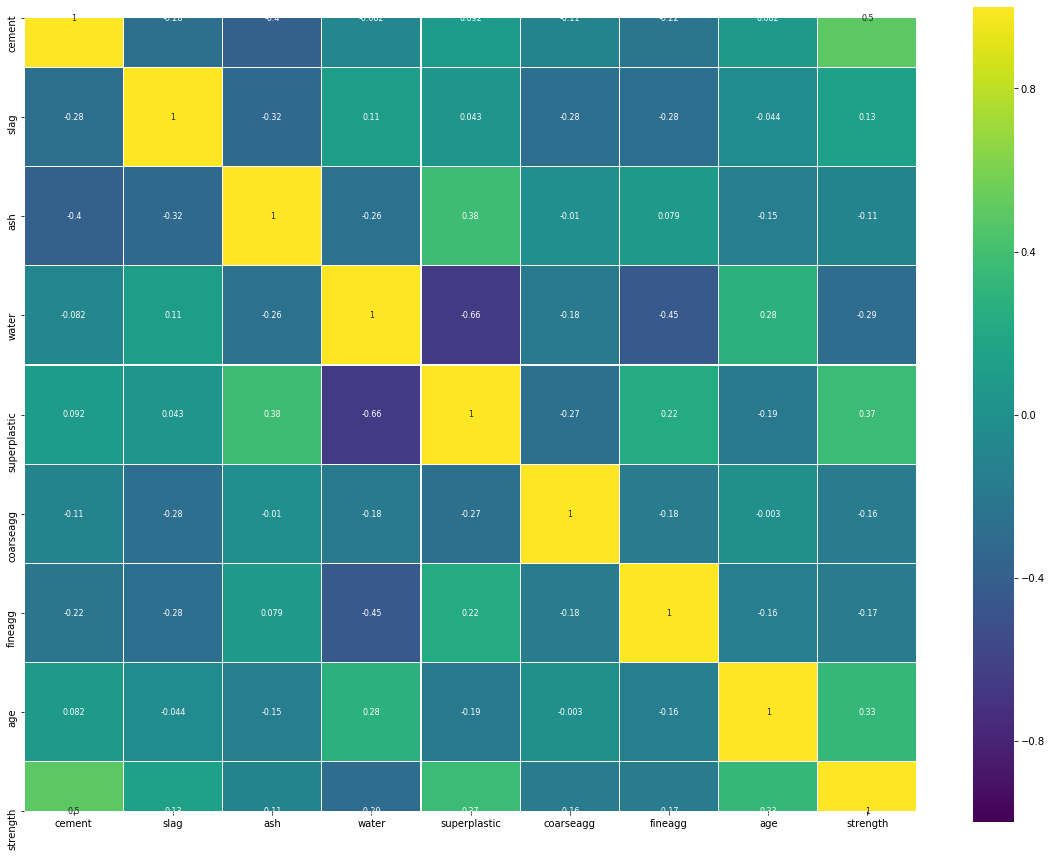

In [15]:
plt.figure(figsize=(20,15))
sns.heatmap(con.corr(), 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);
plt.show()

- cement, superplastic and age has some corelation with strength with cement being the highest(.5)
- water and superplastic has some moderate level of corelation with each other.
- slag, ash, coarseagg and fineagg has bery less corelation with strength

### Handling missingvalues, Outliers and data preparation for the model

#### Missing Values

In [16]:
con.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

- There are no null values present in the data.

##### lets create a copy and work on the copied data while we keep the actual data untouched

In [17]:
con_copy = con.copy()
con_copy.shape

(1030, 9)

#### Removing Duplicates

In [18]:
print("There are "+str(len(con_copy[con_copy.duplicated(keep=False)]))+" duplicate values")

There are 36 duplicate values


- Lets keep the first instance of the duplicated values and remove the rest

In [19]:
print("There are "+str(len(con_copy[con_copy.duplicated(keep="first")]))+" duplicate values")
con_copy[con_copy.duplicated(keep="first")]

There are 25 duplicate values


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
278,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
298,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
400,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
420,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
463,362.6,189.0,0.0,164.9,11.6,944.7,755.8,56,77.30
468,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,28,19.69
482,425.0,106.3,0.0,153.5,16.5,852.1,887.1,91,65.20
493,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30
517,425.0,106.3,0.0,153.5,16.5,852.1,887.1,56,64.30
525,362.6,189.0,0.0,164.9,11.6,944.7,755.8,28,71.30


In [20]:
con_copy.drop_duplicates(keep='first', inplace=True)
print("Dropped! There are "+str(len(con_copy[con_copy.duplicated(keep=False)]))+" duplicate values")
print(con_copy.shape)
con_copy[con_copy.duplicated(keep=False)]

Dropped! There are 0 duplicate values
(1005, 9)


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength


- The duplicates have been removed which are 25 records
- The first instances are kept as we need the original

#### checking for outliers

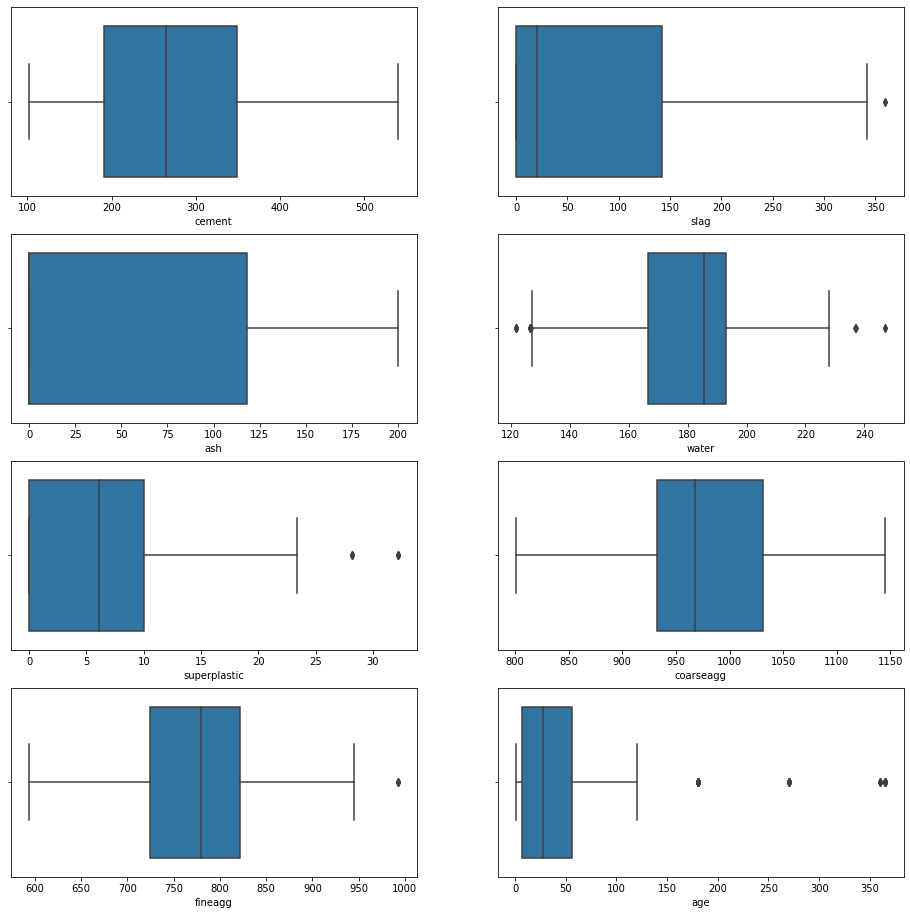

In [21]:
fig, ax2 = plt.subplots(4, 2, figsize=(16, 16))
sns.boxplot(con_copy['cement'],ax=ax2[0][0])
sns.boxplot(con_copy['slag'],ax=ax2[0][1])
sns.boxplot(con_copy['ash'],ax=ax2[1][0])
sns.boxplot(con_copy['water'],ax=ax2[1][1])
sns.boxplot(con_copy['superplastic'],ax=ax2[2][0])
sns.boxplot(con_copy['coarseagg'],ax=ax2[2][1])
sns.boxplot(con_copy['fineagg'],ax=ax2[3][0])
sns.boxplot(con_copy['age'],ax=ax2[3][1])

- slag, water, superplastic, fineagg and age has outliers in it.

In [22]:
outliers = []
for col in con_copy.columns[:-1]:
    Q1 = np.percentile(a= con_copy[col], q = 25)
    Q3 = np.percentile(a= con_copy[col], q = 75)
    
    IQR = Q3-Q1
    ul = Q3 + (1.5*IQR)
    ll = Q1 - (1.5*IQR)
    
    print("outlier in feature: "+col+"(" + str(len(con_copy[(con_copy[col]>ul) | (con_copy[col]<ll)]))+")")
    display(con_copy[(con_copy[col]>ul) | (con_copy[col]<ll)])
    outliers = outliers + list(con_copy[(con_copy[col]>ul) | (con_copy[col]<ll)].index.values)

outlier in feature: cement(0)


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength


outlier in feature: slag(2)


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
918,239.6,359.4,0.0,185.7,0.0,941.6,664.3,28,39.44
990,239.6,359.4,0.0,185.7,0.0,941.6,664.3,7,25.42


outlier in feature: ash(0)


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength


outlier in feature: water(15)


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
33,313.0,145.0,0.0,127.0,8.0,1000.0,822.0,28,44.52
66,237.0,92.0,71.0,247.0,6.0,853.0,695.0,28,28.63
129,375.0,93.8,0.0,126.6,23.4,852.1,992.6,91,62.50
263,236.9,91.7,71.5,246.9,6.0,852.9,695.4,28,28.63
432,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,28,24.24
447,375.0,93.8,0.0,126.6,23.4,852.1,992.6,7,45.70
462,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,100,39.23
504,375.0,93.8,0.0,126.6,23.4,852.1,992.6,3,29.00
584,375.0,93.8,0.0,126.6,23.4,852.1,992.6,56,60.20
587,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,3,7.75


outlier in feature: superplastic(10)


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
44,531.3,0.0,0.0,141.8,28.2,852.1,893.7,91,59.2
156,531.3,0.0,0.0,141.8,28.2,852.1,893.7,28,56.4
232,469.0,117.2,0.0,137.8,32.2,852.1,840.5,56,69.3
292,469.0,117.2,0.0,137.8,32.2,852.1,840.5,91,70.7
538,531.3,0.0,0.0,141.8,28.2,852.1,893.7,7,46.9
744,469.0,117.2,0.0,137.8,32.2,852.1,840.5,7,54.9
816,469.0,117.2,0.0,137.8,32.2,852.1,840.5,28,66.9
838,531.3,0.0,0.0,141.8,28.2,852.1,893.7,56,58.8
955,469.0,117.2,0.0,137.8,32.2,852.1,840.5,3,40.2
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.3


outlier in feature: coarseagg(0)


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength


outlier in feature: fineagg(5)


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
129,375.0,93.8,0.0,126.6,23.4,852.1,992.6,91,62.5
447,375.0,93.8,0.0,126.6,23.4,852.1,992.6,7,45.7
504,375.0,93.8,0.0,126.6,23.4,852.1,992.6,3,29.0
584,375.0,93.8,0.0,126.6,23.4,852.1,992.6,56,60.2
857,375.0,93.8,0.0,126.6,23.4,852.1,992.6,28,56.7


outlier in feature: age(59)


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
51,331.0,0.0,0.0,192.0,0.0,978.0,825.0,180,39.00
64,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
93,427.5,47.5,0.0,228.0,0.0,932.0,594.0,180,41.84
99,237.5,237.5,0.0,228.0,0.0,932.0,594.0,180,36.25
103,380.0,0.0,0.0,228.0,0.0,932.0,670.0,180,53.10
133,236.0,0.0,0.0,193.0,0.0,968.0,885.0,365,25.08
144,302.0,0.0,0.0,203.0,0.0,974.0,817.0,180,26.74
149,380.0,95.0,0.0,228.0,0.0,932.0,594.0,270,41.15
152,322.0,0.0,0.0,203.0,0.0,974.0,800.0,180,29.59
157,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


- The outliers in all the features are displayed above
- The outliers will be replaced with the median values. since there are less number of outliers median replacement is better than outlier capping

In [23]:
for cols in con_copy.columns[:-1]:
    Q1 = np.percentile(a= con_copy[cols], q = 25)
    Q3 = np.percentile(a= con_copy[cols], q = 75)
    
    IQR = Q3-Q1
    ul = Q3 + (1.5*IQR)
    ll = Q1 - (1.5*IQR)
    con_copy.loc[(con_copy[cols] < ll) | (con_copy[cols] > ul), cols] = con_copy[cols].median()

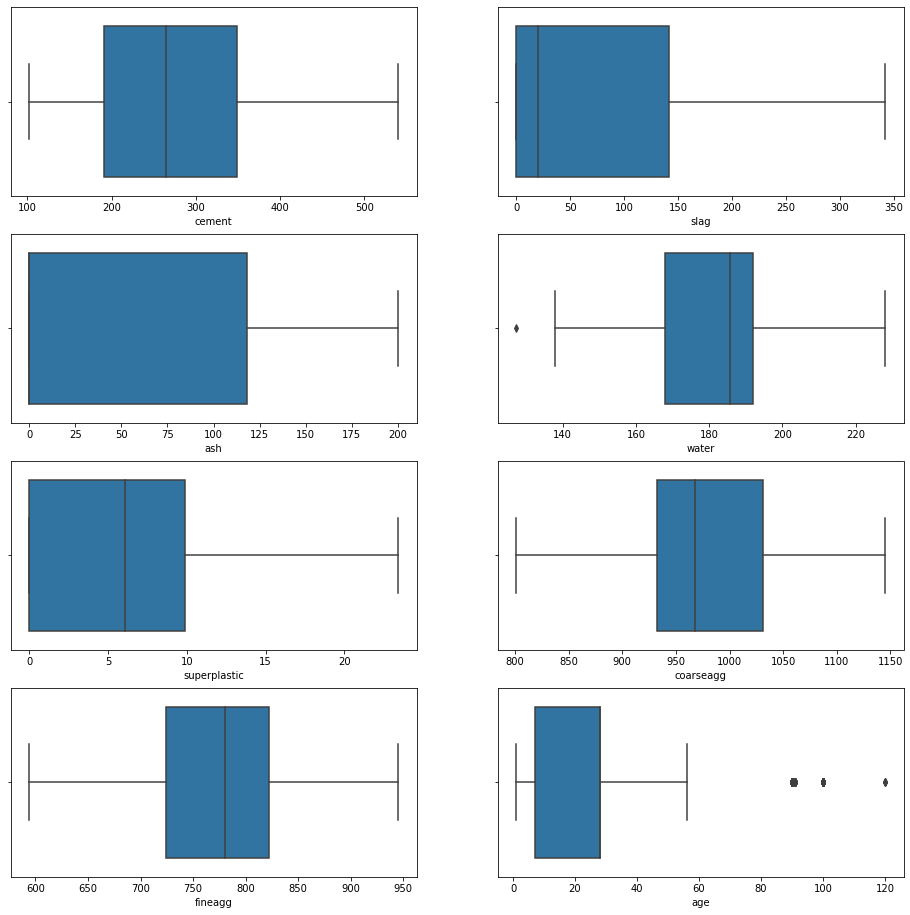

In [24]:
fig, ax2 = plt.subplots(4, 2, figsize=(16, 16))
sns.boxplot(con_copy['cement'],ax=ax2[0][0])
sns.boxplot(con_copy['slag'],ax=ax2[0][1])
sns.boxplot(con_copy['ash'],ax=ax2[1][0])
sns.boxplot(con_copy['water'],ax=ax2[1][1])
sns.boxplot(con_copy['superplastic'],ax=ax2[2][0])
sns.boxplot(con_copy['coarseagg'],ax=ax2[2][1])
sns.boxplot(con_copy['fineagg'],ax=ax2[3][0])
sns.boxplot(con_copy['age'],ax=ax2[3][1])

- we can notice from the above box plot the outliers are removed and the new outliers which are displayed are the residual effect from replacing the outliers with median values

### Model Building

- Scaling the Data with their Zscore so we can have the units of the features in the same scale

In [52]:
con_copyz = con_copy.apply(zscore)
con_copyz = pd.DataFrame(con_copyz , columns  = con_copy.columns)
con_copyz.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1.005000e+03,1.005000e+03,1.005000e+03,1.005000e+03,1.005000e+03,1.005000e+03,1.005000e+03,1.005000e+03,1.005000e+03
mean,-1.838220e-16,-1.721122e-16,-3.031296e-16,-3.957586e-16,-1.767519e-17,1.174737e-15,-2.651279e-18,4.971148e-17,-2.076835e-16
std,1.000498e+00,1.000498e+00,1.000498e+00,1.000498e+00,1.000498e+00,1.000498e+00,1.000498e+00,1.000498e+00,1.000498e+00
min,-1.693618e+00,-8.376771e-01,-8.653750e-01,-2.746853e+00,-1.073915e+00,-2.235936e+00,-2.254691e+00,-1.125340e+00,-2.022545e+00
25%,-8.431237e-01,-8.376771e-01,-8.653750e-01,-7.223530e-01,-1.073915e+00,-5.465081e-01,-6.007737e-01,-9.083541e-01,-7.206848e-01
50%,-1.307032e-01,-6.029286e-01,-8.653750e-01,1.580806e-01,5.682765e-02,-8.223793e-02,1.062347e-01,-1.489034e-01,-8.910756e-02
75%,6.747251e-01,8.208207e-01,9.779928e-01,4.714553e-01,7.612249e-01,7.302348e-01,6.393470e-01,-1.489034e-01,5.910052e-01
max,2.506116e+00,3.177695e+00,2.252612e+00,2.262168e+00,3.263689e+00,2.200424e+00,2.200604e+00,3.178214e+00,2.909041e+00


- The data is split into features and Target Variables

In [53]:
X = con_copyz.drop(labels= "strength" , axis = 1)
y = con_copyz[['strength']]
print("Size of X: ", X.shape)
print("Size of y: ", y.shape)

Size of X:  (1005, 8)
Size of y:  (1005, 1)


#### Train test Split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 50)
print("The shape of X_train", X_train.shape)
print("The shape of y_train", y_train.shape)
print("The shape of X_test", X_test.shape)
print("The shape of y_test", y_test.shape)

The shape of X_train (703, 8)
The shape of y_train (703, 1)
The shape of X_test (302, 8)
The shape of y_test (302, 1)


#### Decision Tree Regressor

In [55]:
Dt_model = DecisionTreeRegressor()
Dt_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [56]:
Dt_train_acc = Dt_model.score(X_train, y_train)
Dt_test_acc = Dt_model.score(X_test, y_test)
print("The Accuracy score of Decision Tree Model on Train Data is : ",Dt_train_acc)
print("The Accuracy score of Decision Tree Model on Test Data is : ",Dt_test_acc)

The Accuracy score of Decision Tree Model on Train Data is :  0.9924360754215085
The Accuracy score of Decision Tree Model on Test Data is :  0.7844103102951904


- The model is overfitting as the accuracy on the train is almost 100% and there is a huge drop in the test set

### Feature importance

              importance
ash             0.005802
coarseagg       0.032170
fineagg         0.047116
water           0.060325
slag            0.091272
superplastic    0.105885
age             0.323685
cement          0.333744


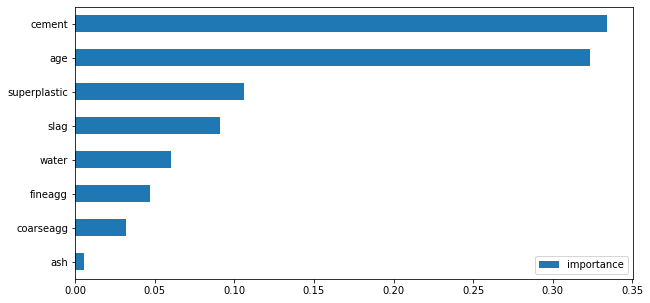

In [57]:
attributes = pd.DataFrame(Dt_model.feature_importances_, columns = ["importance"], index = X.columns)
attributes.sort_values(by=['importance'],ascending = True, inplace = True)
print(attributes)
attributes.plot(kind = 'barh',figsize = (10,5))

- as we can see from the data displayed above we can interpret that ash has the least importance and it is so low that it has very less importance to make significant changes in the model.
- coarseagg and fineagg has very less significance too. so we can build a model without them and check it.
- we will be using cutoff value as 0.05 and those features below this value can be eliminated.
- The features ash, coarseagg, fineagg has values below 0.05 and these features can be removed and the model can be trained with the rest of the features

#### k -Fold for Decision Tree model

In [58]:
num_folds = 10
seed = 50
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(Dt_model,X, y, cv=kfold)
Dt_kfold=np.mean(abs(results1))
print('Average accuracy of Decision Tree in KFold: ',Dt_kfold)

accuracy = pd.DataFrame({'Model':['Decision Tree'], 'Train accuracy': Dt_train_acc, 'Test accuracy': Dt_test_acc, 'K-Fold': Dt_kfold},index={'1'})
accuracy = accuracy[['Model', 'Train accuracy', 'Test accuracy', 'K-Fold']]
accuracy

Average accuracy of Decision Tree in KFold:  0.8455435076228067


,Model,Train accuracy,Test accuracy,K-Fold
1,Decision Tree,0.992436,0.78441,0.845544


#### Decision Tree Pruned

- Lets limit the depth and leaves in the DT and check how it performs

In [59]:
Dtp_model = DecisionTreeRegressor(max_depth = 4, min_samples_leaf=15)
Dtp_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=15,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [60]:
Dtp_train_acc = Dtp_model.score(X_train, y_train)
Dtp_test_acc = Dtp_model.score(X_test, y_test)
print("The Accuracy score of Decision Tree pruned Model on Train Data is : ",Dtp_train_acc)
print("The Accuracy score of Decision Tree pruned Model on Test Data is : ",Dtp_test_acc)

num_folds = 10
seed = 50
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(Dtp_model,X, y, cv=kfold)
Dtp_kfold=np.mean(abs(results1))
print('Average accuracy of Decision Tree pruned in KFold: ',Dtp_kfold)

temp = pd.DataFrame({'Model':['Decision Tree pruned'], 'Train accuracy': Dtp_train_acc, 'Test accuracy': Dtp_test_acc, 'K-Fold': Dtp_kfold},index={'1'})
accuracy = pd.concat([accuracy, temp])
accuracy

The Accuracy score of Decision Tree pruned Model on Train Data is :  0.7088525541286717
The Accuracy score of Decision Tree pruned Model on Test Data is :  0.6613408646850683
Average accuracy of Decision Tree pruned in KFold:  0.6454662954026065


,Model,Train accuracy,Test accuracy,K-Fold
1,Decision Tree,0.992436,0.784410,0.845544
1,Decision Tree pruned,0.708853,0.661341,0.645466


- After the tree is pruned we can see the drop in accuracy but the model is not overfitting anymore

#### Droping Features ash, coarseagg and fineagg

In [63]:
drop = ["strength", "ash", "fineagg" , "coarseagg"]
X = con_copyz.drop(labels= drop , axis = 1)
y = con_copyz[['strength']]
print(X.shape)
print(y.shape)

(1005, 5)
(1005, 1)


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)
print("The shape of X_train", X_train.shape)
print("The shape of y_train", y_train.shape)
print("The shape of X_test", X_test.shape)
print("The shape of y_test", y_test.shape)

The shape of X_train (703, 5)
The shape of y_train (703, 1)
The shape of X_test (302, 5)
The shape of y_test (302, 1)


In [65]:
Dtn_model = DecisionTreeRegressor()
Dtn_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [66]:
Dtn_train_acc = Dtn_model.score(X_train, y_train)
Dtn_test_acc = Dtn_model.score(X_test, y_test)
print("The Accuracy score of Decision Tree modified Model on Train Data is : ",Dtn_train_acc)
print("The Accuracy score of Decision Tree modified Model on Test Data is : ",Dtn_test_acc)

num_folds = 10
seed = 50
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(Dtn_model,X, y, cv=kfold)
Dtn_kfold=np.mean(abs(results1))
print('Average accuracy of Decision Tree modified model in KFold: ',Dtn_kfold)

temp = pd.DataFrame({'Model':['Decision Tree Modified'], 'Train accuracy': Dtn_train_acc, 'Test accuracy': Dtn_test_acc, 'K-Fold': Dtn_kfold},index={'1'})
accuracy = pd.concat([accuracy, temp])
#results = results[['Method', 'Train accuracy', 'Test accuracy']]
accuracy

The Accuracy score of Decision Tree modified Model on Train Data is :  0.9925159513298937
The Accuracy score of Decision Tree modified Model on Test Data is :  0.7239700542049641
Average accuracy of Decision Tree modified model in KFold:  0.8469189223311993


,Model,Train accuracy,Test accuracy,K-Fold
1,Decision Tree,0.992436,0.784410,0.845544
1,Decision Tree pruned,0.708853,0.661341,0.645466
1,Decision Tree Modified,0.992516,0.723970,0.846919


- The Above model overfits.
- after droping the features there is not much difference in the performance of the model as train and test accuracy are same

In [67]:
drop = ["strength", "ash", "fineagg", "coarseagg"]
X = con_copyz.drop(labels= drop , axis = 1)
y = con_copyz[['strength']]
print(X.shape)
print(y.shape)

(1005, 5)
(1005, 1)


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)
print("The shape of X_train", X_train.shape)
print("The shape of y_train", y_train.shape)
print("The shape of X_test", X_test.shape)
print("The shape of y_test", y_test.shape)

The shape of X_train (703, 5)
The shape of y_train (703, 1)
The shape of X_test (302, 5)
The shape of y_test (302, 1)


In [69]:
Dtpn_model = DecisionTreeRegressor(max_depth = 4, min_samples_leaf=15)
Dtpn_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=15,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [70]:
Dtpn_train_acc = Dtpn_model.score(X_train, y_train)
Dtpn_test_acc = Dtpn_model.score(X_test, y_test)
print("The Accuracy score of Decision Tree pruned Model after droping features on Train Data is : ",Dtpn_train_acc)
print("The Accuracy score of Decision Tree pruned Model after droping features on Test Data is : ",Dtpn_test_acc)

num_folds = 10
seed = 50
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(Dtpn_model,X, y, cv=kfold)
Dtpn_kfold=np.mean(abs(results1))
print('Average accuracy of Decision Tree modified model in KFold: ',Dtpn_kfold)

temp = pd.DataFrame({'Model':['Decision Tree pruned modified'], 'Train accuracy': Dtpn_train_acc, 'Test accuracy': Dtpn_test_acc, 'K-Fold': Dtpn_kfold},index={'1'})
accuracy = pd.concat([accuracy, temp])
accuracy

The Accuracy score of Decision Tree pruned Model after droping features on Train Data is :  0.737981448533802
The Accuracy score of Decision Tree pruned Model after droping features on Test Data is :  0.5939327416947444
Average accuracy of Decision Tree modified model in KFold:  0.641364044982988


,Model,Train accuracy,Test accuracy,K-Fold
1,Decision Tree,0.992436,0.784410,0.845544
1,Decision Tree pruned,0.708853,0.661341,0.645466
1,Decision Tree Modified,0.992516,0.723970,0.846919
1,Decision Tree pruned modified,0.737981,0.593933,0.641364


- This model overfits too.
- Ther performance is verylow and this is not a desirable model

### K - means Clustering

In [71]:
cluster_range = range( 1, 15 )  
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(con_copyz)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,9045.000000
1,2,7363.359373
2,3,6306.575809
3,4,5527.087293
4,5,5068.850609
5,6,4593.984392
6,7,4175.056945
7,8,3905.636283
8,9,3716.442042
9,10,3542.824737


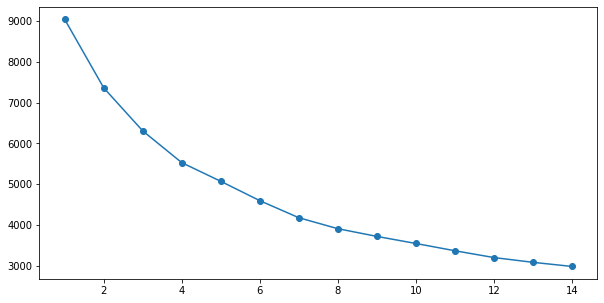

In [72]:
plt.figure(figsize=(10,5))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

- From the table and the curve we can find that there is a noticable drop in the errors till value 6 and then the decrease slows down on 6 to 7 so we can take the value 6

In [73]:
cluster = KMeans( n_clusters = 6, random_state = 50)
cluster.fit(con_copyz)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [74]:
prediction=cluster.predict(con_copyz)
con_copyz["Label"] = prediction     
con_copyz1 = con_copyz.copy(deep = True)

In [75]:
labels = cluster.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[168 133 166 267  90 181]


In [76]:
centroids = cluster.cluster_centers_
centroids

array([[ 1.02700867,  0.46039104, -0.48552308, -0.97476412,  1.01809162,
        -0.58468294,  0.12541043,  0.05968719,  1.21966783],
       [-0.50497649,  0.27287726,  1.07657036,  0.44007668,  0.55160612,
        -1.16602947, -0.32994196, -0.22041632, -0.25047562],
       [-0.84850134,  1.44600113, -0.86537497,  0.58073789, -0.7415935 ,
        -0.06939591, -0.15756104, -0.15631058, -0.54246429],
       [-0.58058743, -0.63502411,  1.08399223, -0.67501427,  0.53468755,
         0.6094821 ,  0.44365378,  0.28493293, -0.10186447],
       [ 1.45043993, -0.41493424, -0.71699832,  1.28578731, -0.98493886,
         0.17159175, -1.62533642,  0.16853891,  0.74477641],
       [ 0.33123143, -0.81093392, -0.78928073,  0.40516925, -0.96914676,
         0.47874805,  0.42427172, -0.25419953, -0.6705742 ]])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000C64A32E4C8>,
      dtype=object)

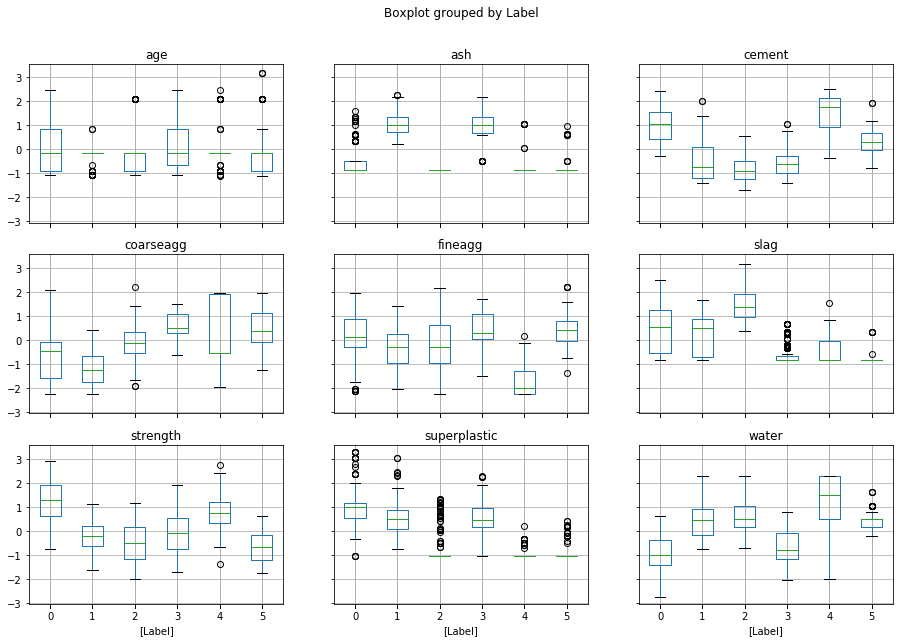

In [77]:
con_copyz.boxplot(by = 'Label',  layout=(3,3), figsize=(15, 10))

- The prediction done from these features are not significant enough to be noticed and we can interpret these as very week predictors. Breaking up the clusters is pointless.
- almost all the clusters have similar range.

#### Randon Forest Regressor

In [79]:
Rf_model=RandomForestRegressor()
Rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [81]:
y_pred = Rf_model.predict(X_test)
print('Accuracy of Random Forest Regressor on Train Set: ',Rf_model.score(X_train,y_train))
print('Accuracy of Random Forest Regressor on Test Set: ',Rf_model.score(X_test,y_test))

Accuracy of Random Forest Regressor on Train Set:  0.9741796514258412
Accuracy of Random Forest Regressor on Test Set:  0.8720943518297001


- This model is overfiting as the accuracy of train set is very much higher than the test set

#### Gradient Boosting Regressor

In [83]:
Gb_model=GradientBoostingRegressor()
Gb_model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [84]:
y_pred = Gb_model.predict(X_test)
print('Accuracy of Gradient Boosting Regressor on Train Set: ',Gb_model.score(X_train,y_train))
print('Accuracy of Gradient Boosting Regressor on Test Set: ',Gb_model.score(X_test,y_test))

Accuracy of Gradient Boosting Regressor on Train Set:  0.929533293899013
Accuracy of Gradient Boosting Regressor on Test Set:  0.8749771668664067


- This model has a suitable outcome.
- the test and train accuracy are good at the same time the model does not overfit

#### AdaBoosting Regressor

In [87]:
Adb_model=AdaBoostRegressor()
Adb_model.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [88]:
y_pred = Adb_model.predict(X_test)
print('Accuracy of Ada Boosting Regressor on Train Set: ',Adb_model.score(X_train,y_train))
print('Accuracy of Ada Boosting Regressor on Test Set: ',Adb_model.score(X_test,y_test))

Accuracy of Ada Boosting Regressor on Train Set:  0.8123540673567113
Accuracy of Ada Boosting Regressor on Test Set:  0.747983439091667


- The performance is very low when compared to the gradient boossting model.
- This model overfits

#### Bagging Regressor

In [89]:
Bag_model=BaggingRegressor()
Bag_model.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [91]:
y_pred = Bag_model.predict(X_test)
print('Accuracy of Ada Boosting Regressor on Train Set: ',Bag_model.score(X_train,y_train))
print('Accuracy of Ada Boosting Regressor on Test Set: ',Bag_model.score(X_test,y_test))

Accuracy of Ada Boosting Regressor on Train Set:  0.9713500352559923
Accuracy of Ada Boosting Regressor on Test Set:  0.8474718027587257


- The model has good train accuracy, but the test accuracy drops a lot so it overfits

### Model Tuning

In [92]:
con_new = X.join(y)
con_new.head()

,cement,slag,water,superplastic,age,strength
0,-1.316792,1.650657,1.043488,-1.073915,-0.148903,-0.329328
1,-1.052152,-0.342358,-1.204851,0.928056,-0.655204,-0.721299
2,-0.274530,-0.837677,0.242642,-0.054393,-0.148903,-0.370491
3,-0.121115,0.500389,2.262168,-1.073915,-0.148903,0.651214
4,-1.187348,1.314966,0.536120,0.612931,-0.148903,-1.042003


- This model is configured and rest of the models are ignored.
- The other models are preforming very poor and they are overfiting the data
- Gradient boosting has a good accuracy on train and test set and does not over fit

### Configuring GradientBoosting Regressor
### RandomSearchCV

- The gradientboosting regressor model is giving us a good output which is desirable and we can further configure it.
- The parameters tuning is done using RandomsearchCV method as it is better than gridsearchCV

In [101]:
Gb_model=GradientBoostingRegressor()

param_dist = {"max_features": sp_randint(1, 4),
              "max_depth":list(np.arange(3,35))+[None],
              "min_samples_split": sp_randint(2, 30),
              "min_samples_leaf": sp_randint(1, 30),
              "n_estimators": np.arange(10,150,5)}
 
randomCV = RandomizedSearchCV(Gb_model, param_distributions=param_dist, n_iter=300,cv=5,random_state=10)
randomCV.fit(X, y)


best = randomCV.best_params_
print(best)
print("")


crossval = GradientBoostingRegressor(n_estimators=best["n_estimators"],min_samples_leaf=best["min_samples_leaf"],min_samples_split=best["min_samples_split"],max_depth=best["max_depth"],max_features=best["max_features"],random_state=10)
crossval_scores = cross_val_score(cl, X, y, cv=5)
crossval_pred = cross_val_predict(cl, X, y, cv=5)

print(crossval_scores)
print("5-fold cv score avg: "+str(crossval_scores.mean())+" +- "+str(round(crossval_scores.std(),2)))

{'max_depth': 27, 'max_features': 2, 'min_samples_leaf': 11, 'min_samples_split': 23, 'n_estimators': 125}

[0.89875386 0.93010476 0.88510779 0.92891163 0.91092571]
5-fold cv score avg: 0.9107607484242898 +- 0.02


### BootStrap

- We got the best parameters from the above randomsearchCV and we will use them and further proceed.
- The confidence interval 95% will be calculated from 500 iterations.
- we will be using resampling(sampling with replacement)

In [121]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

n_iterations = 500
values = con_new.values
n_size = int(len(values))



scores = list()
for i in range(n_iterations):

    train = resample(values, n_samples=n_size) 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])
    
    # fit model
    cl = GradientBoostingRegressor(n_estimators=125,min_samples_leaf=11,min_samples_split=23,max_depth=27,max_features=2,random_state=10)
    cl.fit(train[:,:-1], train[:,-1])

    score = cl.score(test[:,:-1], test[:,-1])
    scores.append(score)


scores

[0.919916821525256,
 0.9090107459753266,
 0.901911280556923,
 0.8911511799722802,
 0.9094775174505979,
 0.9097320098506115,
 0.8973133542952497,
 0.9071693739327386,
 0.9194816164043264,
 0.8864469387985147,
 0.88897390539762,
 0.9247873994419225,
 0.9122975573303359,
 0.8923826067323515,
 0.8814879453661408,
 0.9270343038206743,
 0.8897128897769669,
 0.9090765216272163,
 0.9032815694152803,
 0.8903995327139371,
 0.8976835891615716,
 0.8984544151269066,
 0.9027762673952495,
 0.9133263106970763,
 0.905321793991183,
 0.9121778286188981,
 0.8790241721356911,
 0.9135689503355389,
 0.9097052278051145,
 0.8806714976988772,
 0.9056353514882938,
 0.8975750918098994,
 0.8815381776422849,
 0.9082138653379436,
 0.9000896131372412,
 0.8979157447457269,
 0.9010713016740671,
 0.9059362077820707,
 0.9070589505034218,
 0.9069195987167772,
 0.9148774986361045,
 0.9105110540797657,
 0.9140245491459638,
 0.9129374710094325,
 0.8972665958198632,
 0.8982787415371144,
 0.901656432094624,
 0.902414525234339,

- from the above scores we got we will find the confidence interval with 95% using the upper and lower values.
- Lets see how a bargraph looks like with the scores and confidence interval

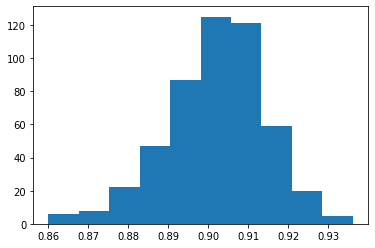

95.0 confidence interval 87.5% and 92.5%


In [122]:
pyplot.hist(scores)
pyplot.show()

alpha = 0.95 
p = ((1.0-alpha)/2.0) * 100 
lower = max(0.0, np.percentile(scores, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(scores, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

- The model above gives us a performance between 87.5 % to 92.5% for 95% of the times